In [1]:
import pandas as pd
import numpy as np
from tqdm import tqdm
import seaborn as sns
from matplotlib import pyplot as plt

### Read The Dataset

In [2]:
df = pd.read_csv('./Dataset/cardekho.csv')
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage(km/ltr/kg),engine,max_power,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78,5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.2,5.0


### Simple EDA Example

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   name                8128 non-null   object 
 1   year                8128 non-null   int64  
 2   selling_price       8128 non-null   int64  
 3   km_driven           8128 non-null   int64  
 4   fuel                8128 non-null   object 
 5   seller_type         8128 non-null   object 
 6   transmission        8128 non-null   object 
 7   owner               8128 non-null   object 
 8   mileage(km/ltr/kg)  7907 non-null   float64
 9   engine              7907 non-null   float64
 10  max_power           7913 non-null   object 
 11  seats               7907 non-null   float64
dtypes: float64(3), int64(3), object(6)
memory usage: 762.1+ KB


In [3]:
df[df['mileage(km/ltr/kg)'].isna()]

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage(km/ltr/kg),engine,max_power,seats
13,Maruti Swift 1.3 VXi,2007,200000,80000,Petrol,Individual,Manual,Second Owner,NaN,NaN,NaN,NaN
31,Fiat Palio 1.2 ELX,2003,70000,50000,Petrol,Individual,Manual,Second Owner,NaN,NaN,NaN,NaN
78,Tata Indica DLS,2003,50000,70000,Diesel,Individual,Manual,First Owner,NaN,NaN,NaN,NaN
87,Maruti Swift VDI BSIV W ABS,2015,475000,78000,Diesel,Dealer,Manual,First Owner,NaN,NaN,NaN,NaN
119,Maruti Swift VDI BSIV,2010,300000,120000,Diesel,Individual,Manual,Second Owner,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
7846,Toyota Qualis Fleet A3,2000,200000,100000,Diesel,Individual,Manual,First Owner,NaN,NaN,NaN,NaN
7996,Hyundai Santro LS zipPlus,2000,140000,50000,Petrol,Individual,Manual,Second Owner,NaN,NaN,NaN,NaN
8009,Hyundai Santro Xing XS eRLX Euro III,2006,145000,80000,Petrol,Individual,Manual,Second Owner,NaN,NaN,NaN,NaN
8068,Ford Figo Aspire Facelift,2017,580000,165000,Diesel,Individual,Manual,First Owner,NaN,NaN,NaN,NaN


In [4]:
df = df.dropna(subset=['mileage(km/ltr/kg)']).reset_index(drop=True)

In [5]:
cat_cols = []
num_cols = []

for i in df.columns:
    # print(str(df[i].dtype))
    if 'int' in str(df[i].dtype) or 'float' in str(df[i].dtype):
        num_cols.append(i)
    else:
        cat_cols.append(i)

print(f'Categorical: {cat_cols}')
print(f'Numeric: {num_cols}')

Categorical: ['name', 'fuel', 'seller_type', 'transmission', 'owner', 'max_power']
Numeric: ['year', 'selling_price', 'km_driven', 'mileage(km/ltr/kg)', 'engine', 'seats']


In [21]:
for i in cat_cols:
    print(df[i].value_counts(),'\n')

name
Maruti Swift Dzire VDI                          129
Maruti Alto 800 LXI                              82
Maruti Alto LXi                                  71
BMW X4 M Sport X xDrive20d                       62
Maruti Swift VDI                                 61
                                               ... 
Honda Jazz 1.2 S AT i VTEC                        1
Hyundai i20 Active 1.2 SX with AVN                1
Ambassador CLASSIC 1500 DSL AC                    1
Tata Harrier XZ Dark Edition BSIV                 1
Toyota Innova 2.5 GX (Diesel) 8 Seater BS IV      1
Name: count, Length: 1983, dtype: int64 

fuel
Diesel    4299
Petrol    3520
CNG         53
LPG         35
Name: count, dtype: int64 

seller_type
Individual          6564
Dealer              1107
Trustmark Dealer     236
Name: count, dtype: int64 

transmission
Manual       6866
Automatic    1041
Name: count, dtype: int64 

owner
First Owner             5215
Second Owner            2017
Third Owner              510
Fou

In [23]:
df['max_power'].unique()

array(['74', '103.52', '78', '90', '88.2', '81.86', '57.5', '37', '67.1',
       '68.1', '108.45', '60', '73.9', '67', '82', '88.5', '46.3',
       '88.73', '64.1', '98.6', '88.8', '83.81', '83.1', '47.3', '73.8',
       '34.2', '35', '81.83', '40.3', '121.3', '138.03', '160.77',
       '117.3', '116.3', '83.14', '67.05', '168.5', '100', '120.7',
       '98.63', '175.56', '103.25', '171.5', '100.6', '174.33', '187.74',
       '170', '78.9', '88.76', '86.8', '108.495', '108.62', '93.7',
       '103.6', '98.59', '189', '67.04', '68.05', '58.2', '82.85', '81.8',
       '73', '120', '94.68', '160', '65', '155', '69.01', '126.32',
       '138.1', '83.8', '126.2', '98.96', '62.1', '86.7', '188', '214.56',
       '177', '280', '148.31', '254.79', '190', '177.46', '204', '141',
       '117.6', '241.4', '282', '150', '147.5', '108.5', '103.5', '183',
       '181.04', '157.7', '164.7', '91.1', '400', '68', '75', '85.8',
       '87.2', '53', '118', '103.2', '83', '84', '58.16', '147.94',
       '

In [6]:
df['max_power'] = df['max_power'].str.strip().replace({'':np.nan}).astype('float')
cat_cols.remove('max_power')
num_cols.append('max_power')

In [31]:
df[num_cols].describe()

,year,selling_price,km_driven,mileage(km/ltr/kg),engine,seats,max_power
count,7907.000000,7.907000e+03,7.907000e+03,7907.000000,7907.000000,7907.000000,7906.000000
mean,2013.982168,6.497417e+05,6.919256e+04,19.418783,1458.625016,5.416719,91.587374
std,3.866650,8.135565e+05,5.678976e+04,4.037145,503.916303,0.959588,35.747216
min,1994.000000,2.999900e+04,1.000000e+00,0.000000,624.000000,2.000000,32.800000
25%,2012.000000,2.700000e+05,3.500000e+04,16.780000,1197.000000,5.000000,68.050000
50%,2015.000000,4.500000e+05,6.000000e+04,19.300000,1248.000000,5.000000,82.000000
75%,2017.000000,6.900000e+05,9.575000e+04,22.320000,1582.000000,5.000000,102.000000
max,2020.000000,1.000000e+07,2.360457e+06,42.000000,3604.000000,14.000000,400.000000


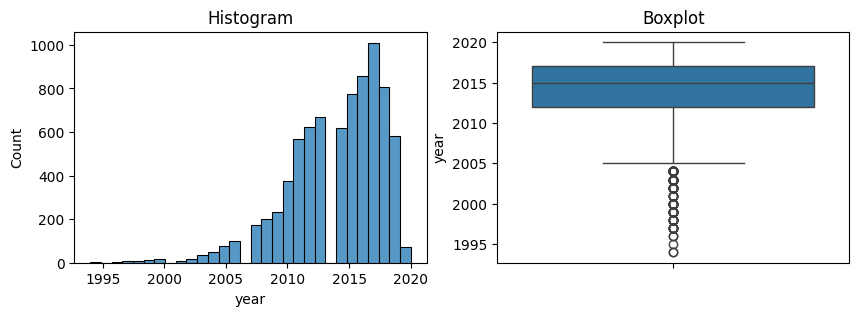

Skewness: -0.9971799180562252
Kurtosis: 1.2810190850614478


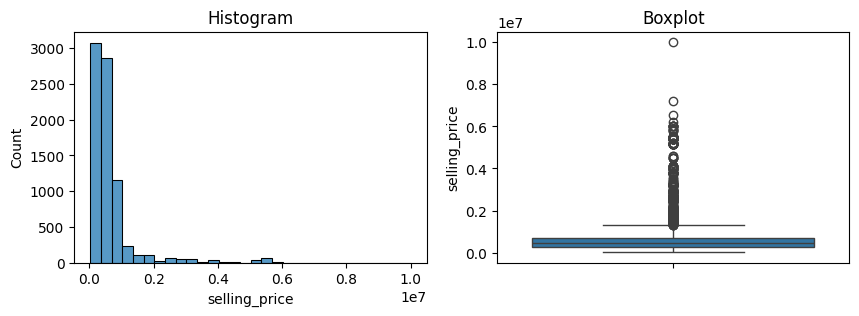

Skewness: 4.156962211336583
Kurtosis: 20.635943342275134


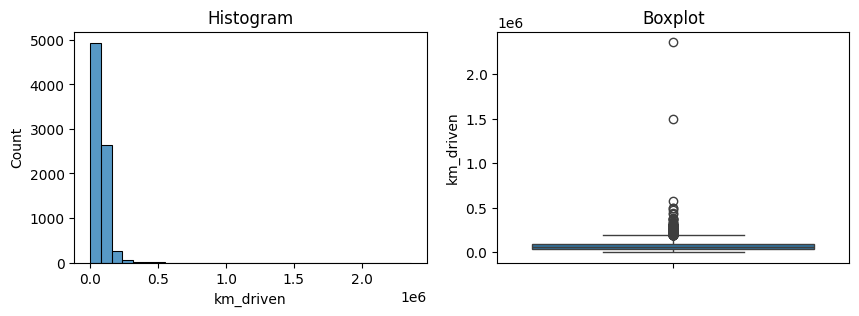

Skewness: 11.342750876385875
Kurtosis: 388.6958530050722


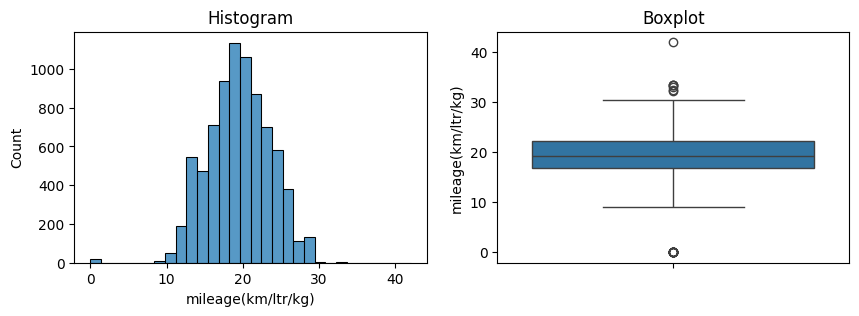

Skewness: -0.14266745404242617
Kurtosis: 0.5698197905721467


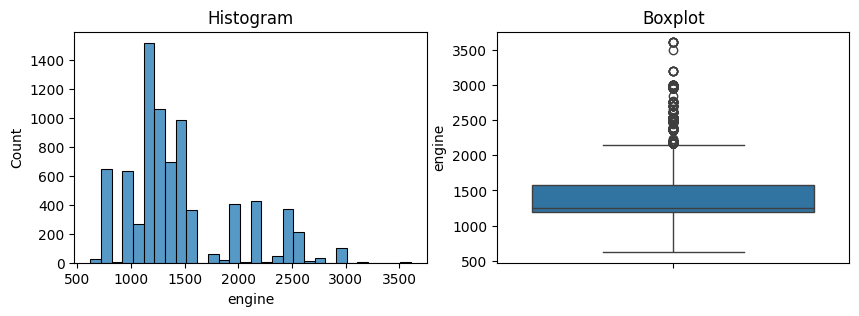

Skewness: 1.1352691298499176
Kurtosis: 0.7325068970469415


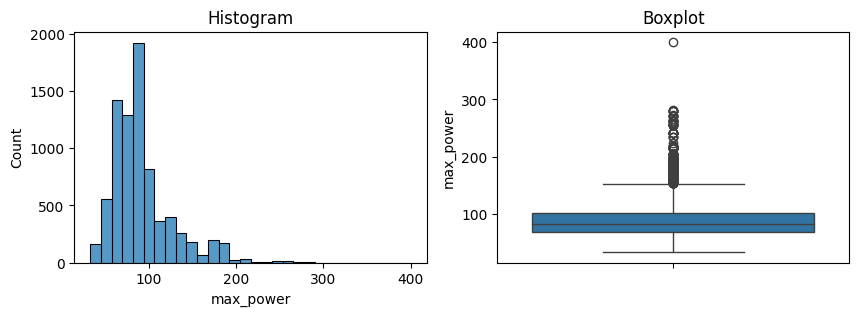

Skewness: 1.6396731592825244
Kurtosis: 3.801616096804457


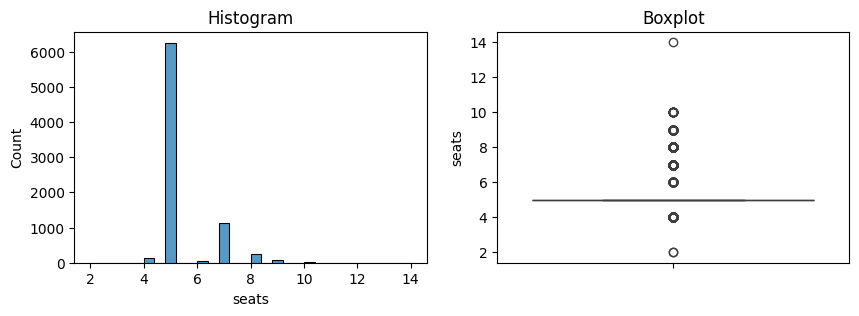

Skewness: 1.969914080776506
Kurtosis: 3.7995093004881757


In [56]:
def check_distribution_outliers(df, columns):
    for col in columns:
        plt.figure(figsize=(10, 3))

        # Histogram
        plt.subplot(1, 2, 1)
        sns.histplot(df[col], bins=30)
        plt.title('Histogram')

        # Boxplot
        plt.subplot(1, 2, 2)
        sns.boxplot(y=df[col])
        plt.title('Boxplot')

        plt.show()

        print('Skewness:', df[col].skew())
        print('Kurtosis:', df[col].kurt())

check_distribution_outliers(df[num_cols], num_cols)

In [57]:
df

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage(km/ltr/kg),engine,max_power,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74.00,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78.00,5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90.00,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.20,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...
7902,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.50,1197.0,82.85,5.0
7903,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.80,1493.0,110.00,5.0
7904,Maruti Swift Dzire ZDi,2009,382000,120000,Diesel,Individual,Manual,First Owner,19.30,1248.0,73.90,5.0
7905,Tata Indigo CR4,2013,290000,25000,Diesel,Individual,Manual,First Owner,23.57,1396.0,70.00,5.0


In [7]:
pd.DataFrame(df.groupby(['fuel','seats'])['name'].count()).reset_index()

,fuel,seats,name
0,CNG,4.0,4
1,CNG,5.0,47
2,CNG,7.0,1
3,CNG,8.0,1
4,Diesel,2.0,2
5,Diesel,4.0,12
6,Diesel,5.0,2904
7,Diesel,6.0,41
8,Diesel,7.0,1037
9,Diesel,8.0,203


### TQDM: A Library for Progress Bar

In [10]:
for i in tqdm(df.columns):
    print(i)

100%|██████████| 12/12 [00:00<00:00, 12035.31it/s]

name
year
selling_price
km_driven
fuel
seller_type
transmission
owner
mileage(km/ltr/kg)
engine
max_power
seats
